# Webscraping- the goal is to scrape quotes, authors, and tags from the quotes website (http://quotes.toscrape.com/). The web scraping process was achieved using Python's requests and BeautifulSoup libraries. 

In [1]:
#import necessary libraries
import requests
from bs4 import BeautifulSoup

# URL of the website
url = "http://quotes.toscrape.com/"

# Send a request to the website and get the HTML content
response = requests.get(url)
if response.status_code == 200:
    print("Successfully fetched the page!")
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")


Successfully fetched the page!


In [2]:
# Parse the page content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find all quote containers on the page
quotes = soup.find_all('div', class_='quote')

# Loop through the quotes and extract the text, author, and tags
for quote in quotes:
    # Extract the text of the quote
    quote_text = quote.find('span', class_='text').get_text()
    
    # Extract the author of the quote
    author = quote.find('small', class_='author').get_text()
    
    # Extract the tags for the quote
    tags = [tag.get_text() for tag in quote.find_all('a', class_='tag')]
    
    # Print the extracted information
    print(f"Quote: {quote_text}")
    print(f"Author: {author}")
    print(f"Tags: {', '.join(tags)}")
    print('-' * 80)

Quote: “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
Author: Albert Einstein
Tags: change, deep-thoughts, thinking, world
--------------------------------------------------------------------------------
Quote: “It is our choices, Harry, that show what we truly are, far more than our abilities.”
Author: J.K. Rowling
Tags: abilities, choices
--------------------------------------------------------------------------------
Quote: “There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Author: Albert Einstein
Tags: inspirational, life, live, miracle, miracles
--------------------------------------------------------------------------------
Quote: “The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
Author: Jane Austen
Tags: aliteracy, books, classic, humor
-----------------------------------------

# Organizing the data into a structured format -Store the scraped quotes, authors, and tags in a list of dictionaries or a Pandas DataFrame. 

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the website
url = "http://quotes.toscrape.com/"

# Send a request to the website and get the HTML content
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find all quote containers on the page
quotes = soup.find_all('div', class_='quote')

# Create lists to store the extracted data
quote_texts = []
authors = []
tags_list = []

# Loop through the quotes and extract the text, author, and tags
for quote in quotes:
    # Extract the text of the quote
    quote_text = quote.find('span', class_='text').get_text()
    # Extract the author of the quote
    author = quote.find('small', class_='author').get_text()
    # Extract the tags for the quote
    tags = [tag.get_text() for tag in quote.find_all('a', class_='tag')]
    
    # Append the data to lists
    quote_texts.append(quote_text)
    authors.append(author)
    tags_list.append(', '.join(tags))  # Join tags as a comma-separated string

# Create a DataFrame with the extracted data
data = pd.DataFrame({
    'Quote': quote_texts,
    'Author': authors,
    'Tags': tags_list
})

# Show the DataFrame
print(data)

# Save the DataFrame to a CSV file for future use
data.to_csv('quotes_data.csv', index=False)


                                               Quote             Author  \
0  “The world as we have created it is a process ...    Albert Einstein   
1  “It is our choices, Harry, that show what we t...       J.K. Rowling   
2  “There are only two ways to live your life. On...    Albert Einstein   
3  “The person, be it gentleman or lady, who has ...        Jane Austen   
4  “Imperfection is beauty, madness is genius and...     Marilyn Monroe   
5  “Try not to become a man of success. Rather be...    Albert Einstein   
6  “It is better to be hated for what you are tha...         André Gide   
7  “I have not failed. I've just found 10,000 way...   Thomas A. Edison   
8  “A woman is like a tea bag; you never know how...  Eleanor Roosevelt   
9  “A day without sunshine is like, you know, nig...       Steve Martin   

                                           Tags  
0        change, deep-thoughts, thinking, world  
1                            abilities, choices  
2  inspirational, life, 

# Analyzing the data
Finding the frequency of authors - analyze which authors have the most quotes.
Most common tags - analyze which tags are most frequently used across the quotes. 
Quote length distribution - to analyze whether shorter or longer quotes are common.

In [6]:
#Analyzing the data
#Load the data from the CSV file
data = pd.read_csv('quotes_data.csv')

# 1. Analyze frequency of authors
author_counts = data['Author'].value_counts()
print("Most Frequent Authors:")
print(author_counts)

# 2. Analyze the most common tags
from collections import Counter

all_tags = []
for tags in data['Tags']:
    all_tags.extend(tags.split(', '))

tag_counts = Counter(all_tags)
print("\nMost Common Tags:")
print(tag_counts.most_common(10))

# 3. Analyze the length of quotes
data['Quote Length'] = data['Quote'].apply(len)
print("\nQuote Length Statistics:")
print(data['Quote Length'].describe())


Most Frequent Authors:
Author
Albert Einstein      3
J.K. Rowling         1
Jane Austen          1
Marilyn Monroe       1
André Gide           1
Thomas A. Edison     1
Eleanor Roosevelt    1
Steve Martin         1
Name: count, dtype: int64

Most Common Tags:
[('inspirational', 3), ('life', 2), ('humor', 2), ('change', 1), ('deep-thoughts', 1), ('thinking', 1), ('world', 1), ('abilities', 1), ('choices', 1), ('live', 1)]

Quote Length Statistics:
count     10.000000
mean      89.500000
std       25.404505
min       50.000000
25%       70.750000
50%       85.000000
75%      109.250000
max      131.000000
Name: Quote Length, dtype: float64


# Data visualization using matplotlib and seaborn
Visualize the top 10 Authors with the Most Quotes
Visualize the most Common Tags
Visualize the Distribution of Quote Lengths

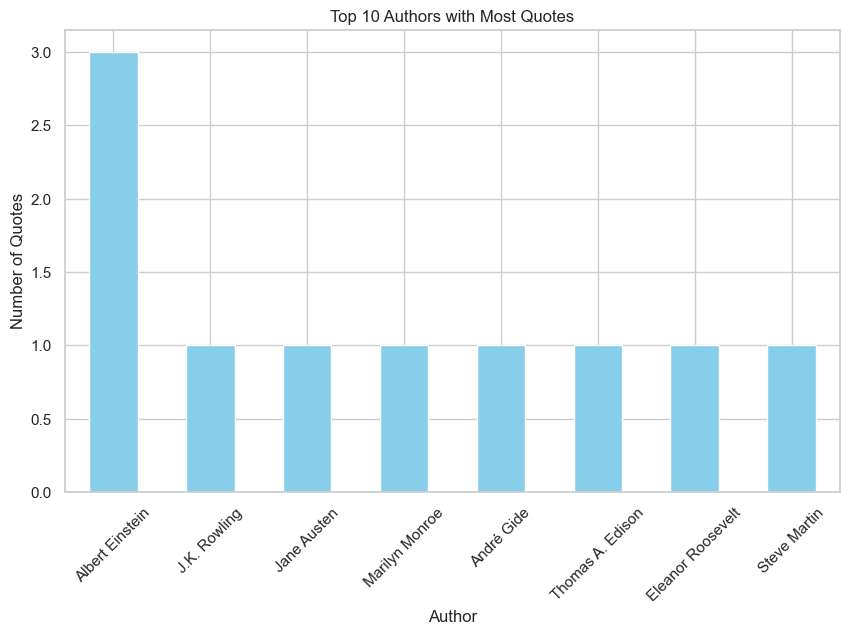

In [5]:
#Visualize top 10 Authors with the Most Quotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is already loaded into a DataFrame
data = pd.read_csv('quotes_data.csv')  # Load your CSV file

#frequency of authors
author_counts = data['Author'].value_counts()  # This counts the number of quotes per author

#Plot the most frequent authors
plt.figure(figsize=(10, 6))
author_counts.head(10).plot(kind='bar', color='skyblue')  # Plot top 10 authors
plt.title('Top 10 Authors with Most Quotes')
plt.xlabel('Author')
plt.ylabel('Number of Quotes')
plt.xticks(rotation=45)
plt.show()



Most Common Tags:
[('inspirational', 3), ('life', 2), ('humor', 2), ('change', 1), ('deep-thoughts', 1), ('thinking', 1), ('world', 1), ('abilities', 1), ('choices', 1), ('live', 1)]


C:\Users\Priyadharshini\AppData\Local\Temp\ipykernel_25584\714344529.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Tag', data=common_tags, palette='viridis')


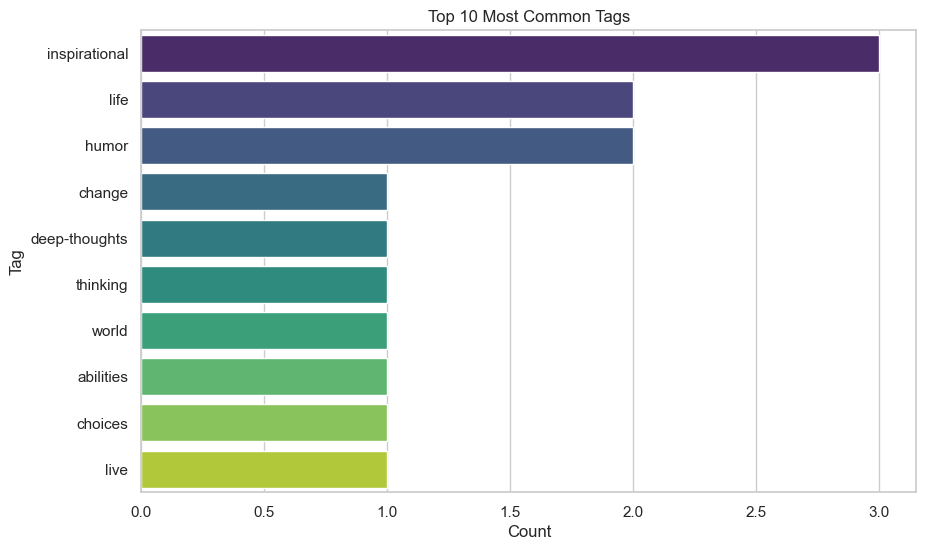

In [7]:
#Visualize most common tags
import matplotlib.pyplot as plt
import seaborn as sns
all_tags = []
for tags in data['Tags']:
    all_tags.extend(tags.split(', '))
tag_counts = Counter(all_tags)
print("\nMost Common Tags:")
print(tag_counts.most_common(10))

#Plot the most common tags
plt.figure(figsize=(10, 6))
common_tags = pd.DataFrame(tag_counts.most_common(10), columns=['Tag', 'Count'])
sns.barplot(x='Count', y='Tag', data=common_tags, palette='viridis')
plt.title('Top 10 Most Common Tags')
plt.xlabel('Count')
plt.ylabel('Tag')
plt.show()


Quote Length Statistics:
count     10.000000
mean      89.500000
std       25.404505
min       50.000000
25%       70.750000
50%       85.000000
75%      109.250000
max      131.000000
Name: Quote Length, dtype: float64


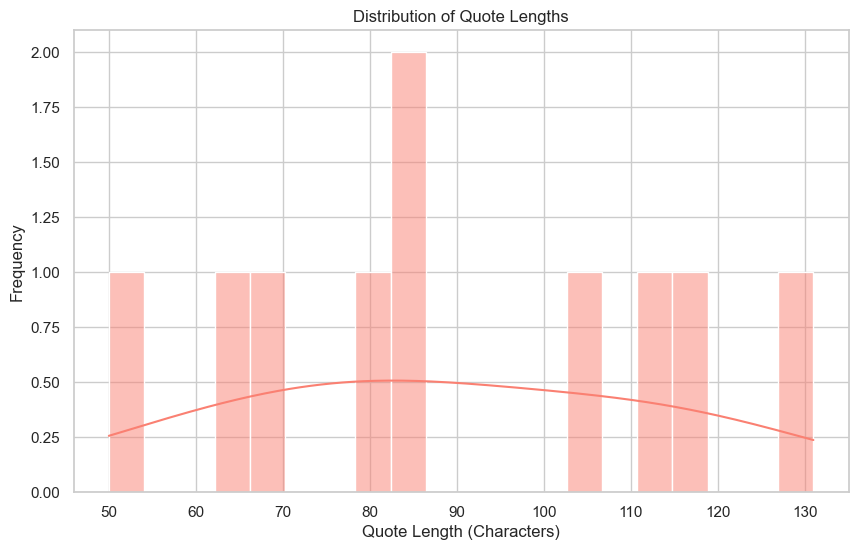

In [8]:
#Visualize the Distribution of Quote Lengths
data['Quote Length'] = data['Quote'].apply(len)
print("\nQuote Length Statistics:")
print(data['Quote Length'].describe())

#Plot the distribution of quote lengths
plt.figure(figsize=(10, 6))
sns.histplot(data['Quote Length'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Quote Lengths')
plt.xlabel('Quote Length (Characters)')
plt.ylabel('Frequency')
plt.show()